# Импорты и Настройка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Модели кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Метрики
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import accuracy_score

# Для дополнительных заданий (Классификация и поиск соседей)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine # Только для получения истинных меток

import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков (как в main.ipynb)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Загрузка и Первичный анализ данных

In [2]:
# Загрузка данных из файла
try:
    df = pd.read_csv('wine-clustering.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Файл не найден. Пожалуйста, загрузите wine-clustering.csv")

# Получение истинных меток для валидации (ARI/NMI)
# Так как в CSV нет меток, берем их из эталонного датасета sklearn
data_ref = load_wine()
if data_ref.data.shape[0] == df.shape[0]:
    y_true = data_ref.target
    print("Истинные метки (y_true) успешно загружены для валидации.")
else:
    print("Внимание: размерности не совпадают. ARI и NMI не будут рассчитаны корректно.")
    y_true = None

# Вывод общей информации
print(f"\nРазмер датасета: {df.shape}")
display(df.head())
display(df.info())
display(df.describe())

Датасет успешно загружен.
Истинные метки (y_true) успешно загружены для валидации.

Размер датасета: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


None

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Предобработка данных

## Проверка на пропуски

In [3]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


## Масштабирование (StandardScaler)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

## Визуализация корреляций (EDA)

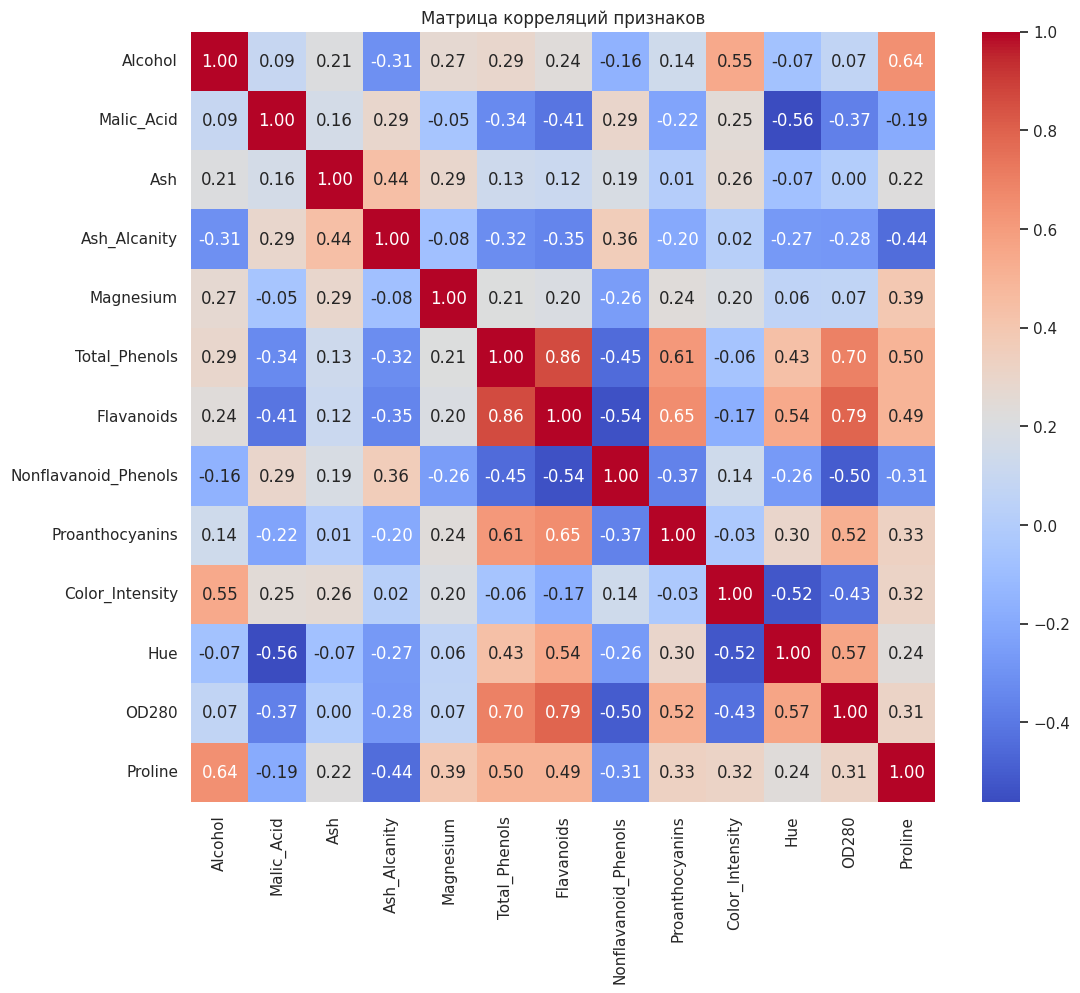

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()

# Построение моделей кластеризации

In [6]:
results_list = []

## KMeans

### Метод локтя

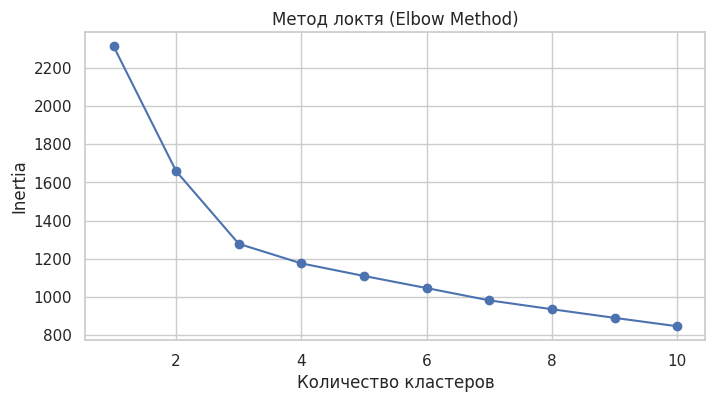

In [7]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')
plt.show()

### Силуэтный анализ

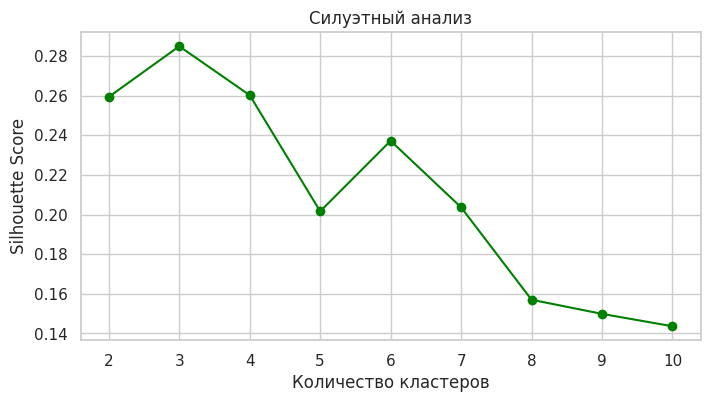

In [8]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Силуэтный анализ')
plt.show()

In [9]:
best_k_kmeans = 3
kmeans_model = KMeans(n_clusters=best_k_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

## Agglomerative Clustering

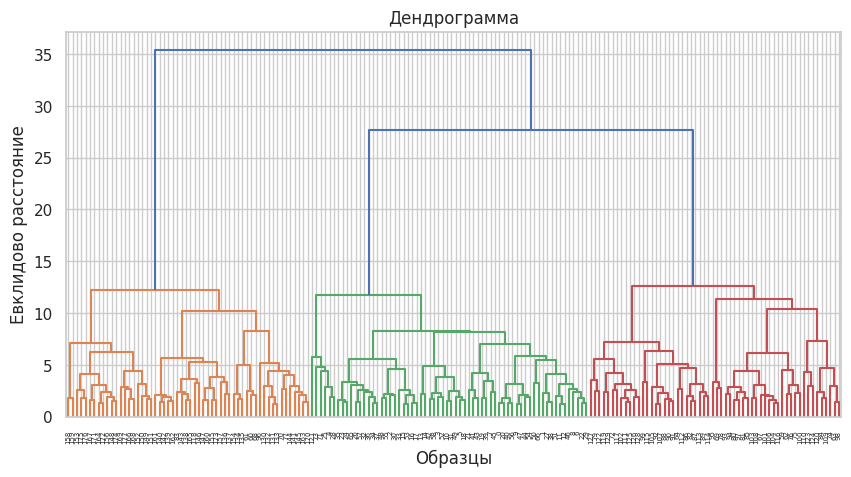

In [10]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Дендрограмма')
plt.xlabel('Образцы')
plt.ylabel('Евклидово расстояние')
plt.show()

In [11]:
agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_model.fit_predict(X_scaled)

## DBSCAN

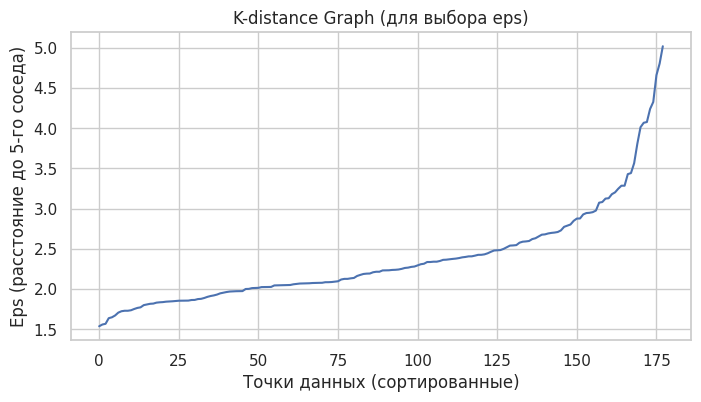

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-distance Graph (для выбора eps)')
plt.ylabel('Eps (расстояние до 5-го соседа)')
plt.xlabel('Точки данных (сортированные)')
plt.grid(True)
plt.show()

In [14]:
eps_val = 2.3
min_samples_val = 5 # min_samples часто берется как D + 1 или просто 5-10

dbscan_model = DBSCAN(eps=eps_val, min_samples=min_samples_val)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

# Подсчет выбросов
n_outliers = list(dbscan_labels).count(-1)
print(f"DBSCAN: Eps={eps_val}, Min_samples={min_samples_val}")
print(f"Количество выбросов: {n_outliers} ({n_outliers/len(df)*100:.2f}%)")

DBSCAN: Eps=2.3, Min_samples=5
Количество выбросов: 42 (23.60%)


# Оценка качества и Анализ

In [15]:
def evaluate_clustering(model_name, labels, X, y_true=None):
    """Функция для расчета метрик и добавления в таблицу"""

    # Исключаем выбросы (-1) для внутренних метрик
    core_mask = labels != -1
    if np.sum(core_mask) < 2: # Если кластеров нет или слишком мало точек
        return None

    X_core = X[core_mask]
    labels_core = labels[core_mask]
    n_clusters = len(set(labels_core))

    # Внутренние метрики
    sil = silhouette_score(X_core, labels_core)
    db = davies_bouldin_score(X_core, labels_core)
    ch = calinski_harabasz_score(X_core, labels_core)

    # Внешние метрики (сравнение с истинными метками, если есть)
    if y_true is not None:
        # Для внешних метрик используем все данные (выбросы DBSCAN считаем как отдельный кластер или ошибку)
        ari = adjusted_rand_score(y_true, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
    else:
        ari = np.nan
        nmi = np.nan

    return {
        'Алгоритм': model_name,
        'Кол-во кластеров': n_clusters,
        'Выбросы': list(labels).count(-1),
        'Silhouette': sil,
        'Davies-Bouldin': db,
        'Calinski-Harabasz': ch,
        'ARI': ari,
        'NMI': nmi
    }

# Расчет метрик
results_list.append(evaluate_clustering('KMeans', kmeans_labels, X_scaled, y_true))
results_list.append(evaluate_clustering('Agglomerative', agg_labels, X_scaled, y_true))
results_list.append(evaluate_clustering('DBSCAN', dbscan_labels, X_scaled, y_true))

results_df = pd.DataFrame(results_list)
print("\n=== Итоговая таблица результатов ===")
display(results_df.sort_values(by='Silhouette', ascending=False))


=== Итоговая таблица результатов ===


,Алгоритм,Кол-во кластеров,Выбросы,Silhouette,Davies-Bouldin,Calinski-Harabasz,ARI,NMI
2,DBSCAN,2,42,0.330734,1.181532,70.465128,0.383848,0.476421
0,KMeans,3,0,0.284859,1.389188,70.940008,0.897495,0.875894
1,Agglomerative,3,0,0.277444,1.418592,67.647468,0.789933,0.786465


# Визуализация результатов

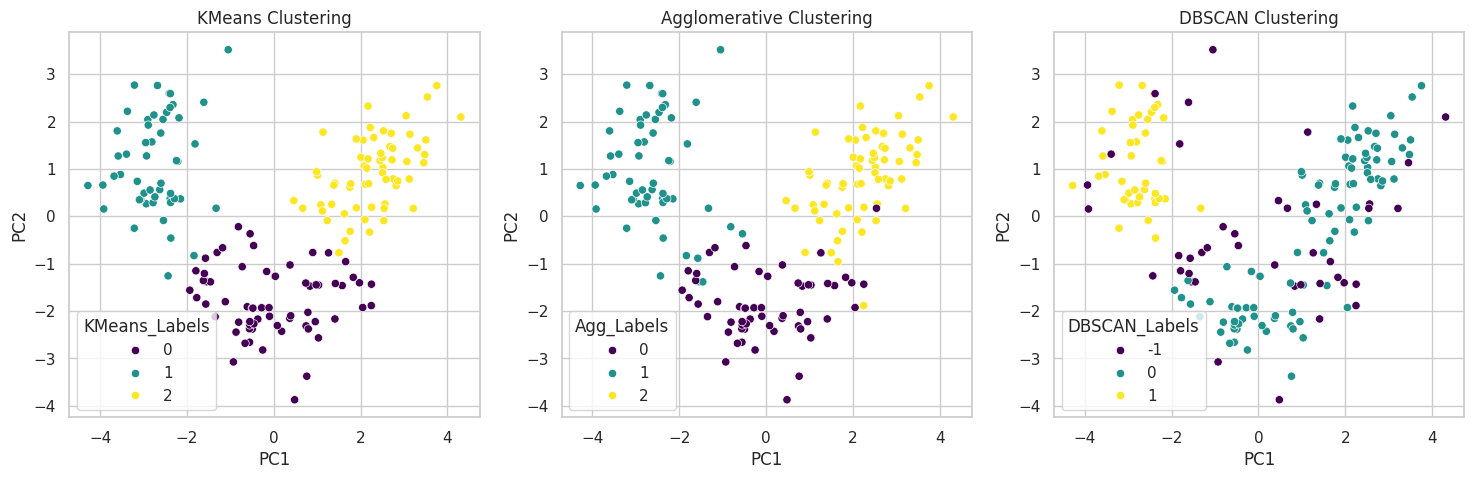

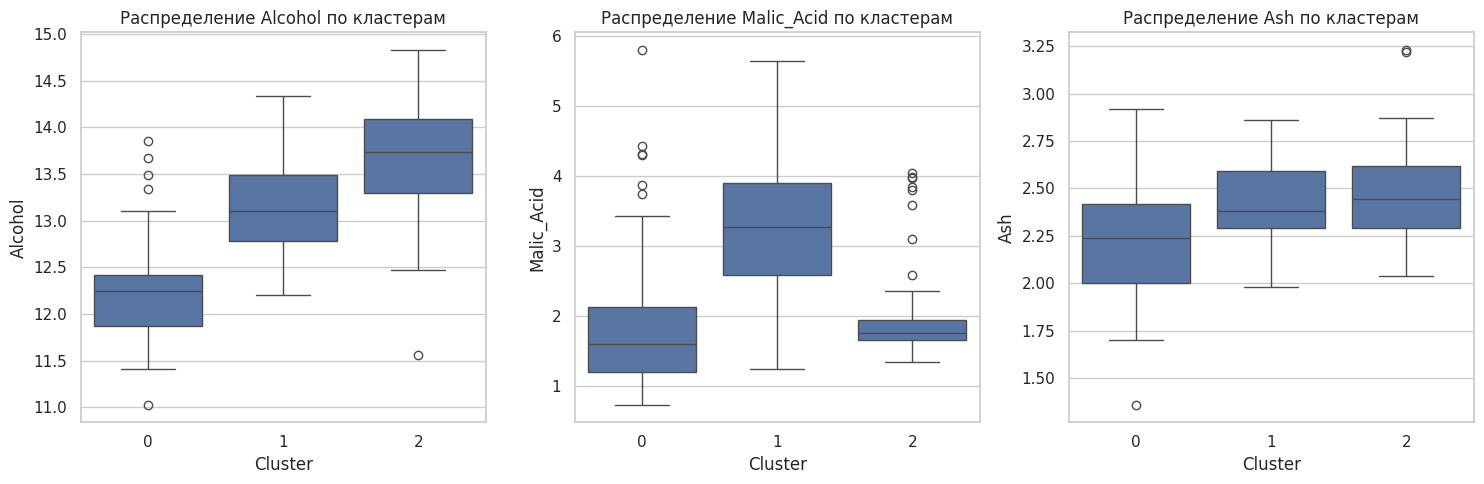

In [16]:
# Проекция данных на 2D с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание DataFrame для графиков
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['KMeans_Labels'] = kmeans_labels
plot_df['Agg_Labels'] = agg_labels
plot_df['DBSCAN_Labels'] = dbscan_labels

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='KMeans_Labels', palette='viridis', ax=axes[0])
axes[0].set_title('KMeans Clustering')

sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Agg_Labels', palette='viridis', ax=axes[1])
axes[1].set_title('Agglomerative Clustering')

sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='DBSCAN_Labels', palette='viridis', ax=axes[2])
axes[2].set_title('DBSCAN Clustering')

plt.show()

# Boxplots для анализа характеристик кластеров (на примере KMeans)
df['Cluster'] = kmeans_labels
# Берем топ-3 признака по дисперсии или просто первые 3 для примера
features_to_plot = df.columns[:3]

plt.figure(figsize=(15, 5))
for i, col in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Распределение {col} по кластерам')
plt.tight_layout()
plt.show()

# Дополнительные задания

## Сравнение с Классификацией

In [17]:
if y_true is not None:
    # Обучаем классификатор (Random Forest)
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Cluster', axis=1), y_true, test_size=0.3, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred_rf)

    print(f"Точность (Accuracy) классификатора RF: {acc:.4f}")
    print(f"ARI лучшей модели кластеризации (KMeans): {results_df.loc[0, 'ARI']:.4f}")
    print("Вывод: Классификация с учителем ожидаемо работает лучше, но кластеризация KMeans показала высокую согласованность с истинными метками.")
else:
    print("Невозможно выполнить сравнение без истинных меток.")

Точность (Accuracy) классификатора RF: 1.0000
ARI лучшей модели кластеризации (KMeans): 0.8975
Вывод: Классификация с учителем ожидаемо работает лучше, но кластеризация KMeans показала высокую согласованность с истинными метками.


## Отбор признаков (PCA) и повторная кластеризация

In [19]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
ari_pca = adjusted_rand_score(y_true, labels_pca) if y_true is not None else 0

print(f"Silhouette Score (Original Features): {results_df.loc[0, 'Silhouette']:.4f}")
print(f"Silhouette Score (PCA Reduced): {sil_pca:.4f}")
print(f"ARI (PCA Reduced): {ari_pca:.4f}")

Silhouette Score (Original Features): 0.2849
Silhouette Score (PCA Reduced): 0.5611
ARI (PCA Reduced): 0.8951
